In [1]:
# Data Loading
import pandas as pd
file_path = 'ElectricCarData_Clean.csv'
df = pd.read_csv(file_path)

In [2]:
# Explore the data
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [6]:
df_int_float = df[['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'Seats', 'PriceEuro']]
df_int_float

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
0,4.6,233,450,161,5,55480
1,10.0,160,270,167,5,30000
2,4.7,210,400,181,5,56440
3,6.8,180,360,206,5,68040
4,9.5,145,170,168,4,32997
...,...,...,...,...,...,...
98,7.5,160,330,191,5,45000
99,4.5,210,335,258,5,96050
100,5.9,200,325,194,5,50000
101,5.1,200,375,232,5,65000


In [9]:
df.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,7.000000,215000.000000


In [10]:
df.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

In [11]:
df.shape

(103, 14)

C:\Users\Shubham\AppData\Local\Temp\ipykernel_18548\3944348639.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["PriceEuro"], kde=True)


Text(0.5, 0, 'Price (Euros)')

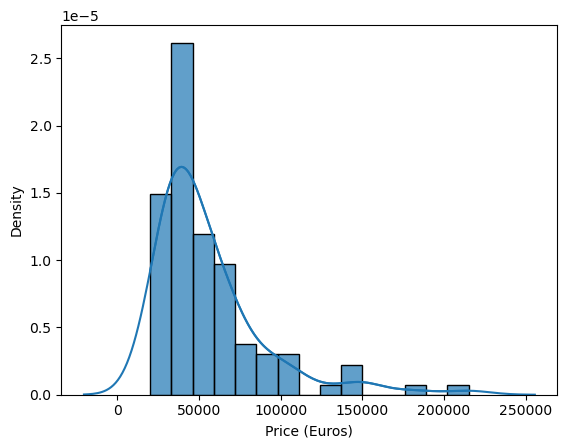

In [3]:
# Distribution of price
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
sns.distplot(df["PriceEuro"], kde=True)
sns.histplot(df["PriceEuro"], kde=True, stat="density")
plt.xlabel("Price (Euros)")

Text(0, 0.5, 'Price (Euros)')

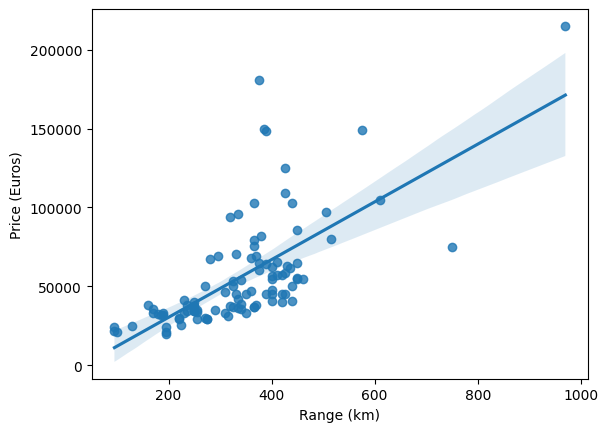

In [13]:
# Price vs Range scatterplot
plt.figure()
sns.regplot(x="Range_Km", y="PriceEuro", data=df)
plt.xlabel("Range (km)")
plt.ylabel("Price (Euros)")

<Figure size 640x480 with 0 Axes>

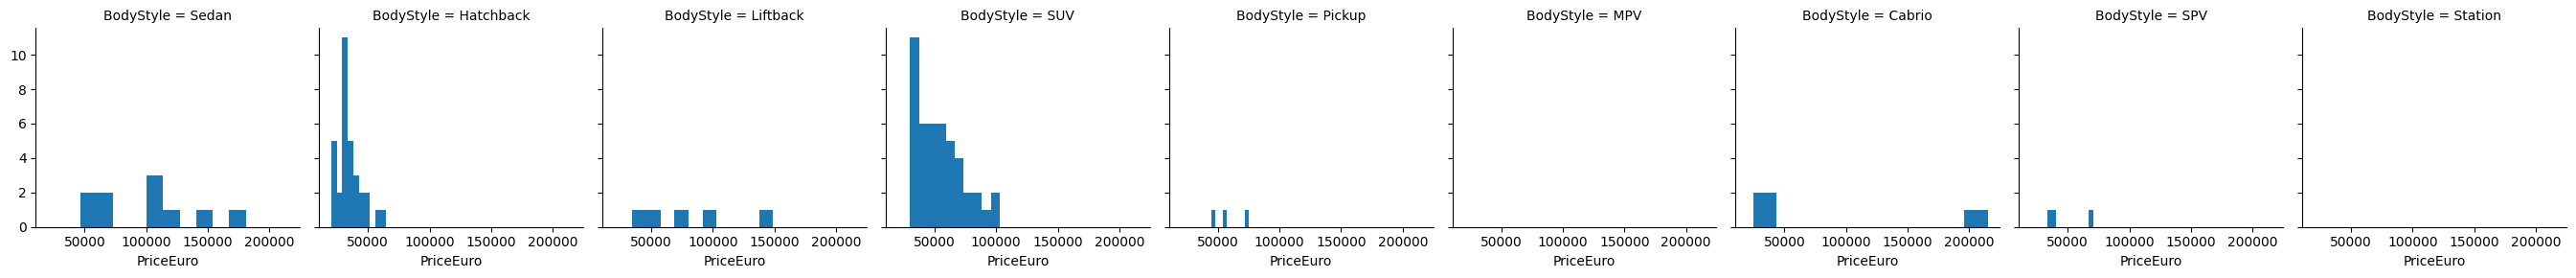

In [14]:
# Faceted histogram by BodyStyle
plt.figure()
sns.FacetGrid(df, col="BodyStyle").map(plt.hist, "PriceEuro")

<Axes: xlabel='PowerTrain', ylabel='PriceEuro'>

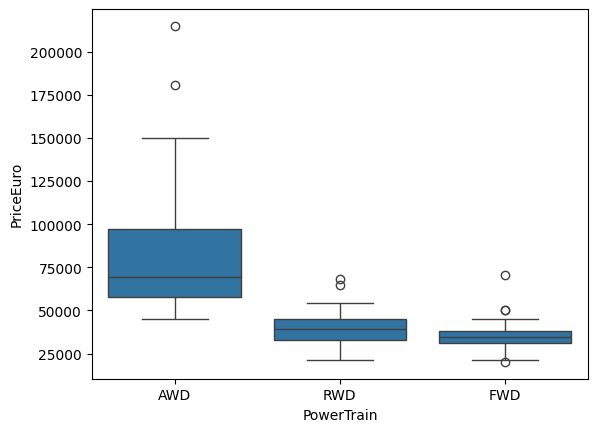

In [15]:
# Boxplot of Price by PowerTrain
plt.figure()
sns.boxplot(x="PowerTrain", y="PriceEuro", data=df)

<Axes: xlabel='Segment', ylabel='count'>

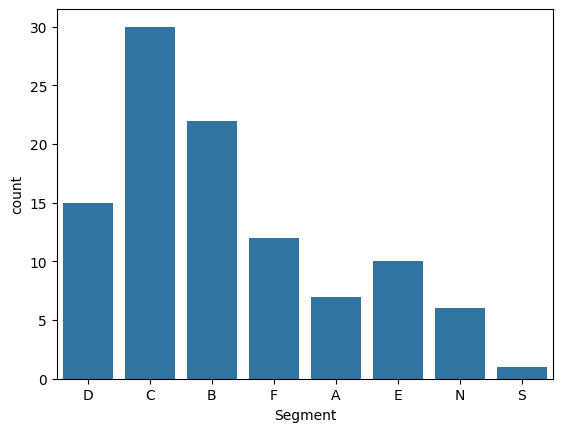

In [16]:
# Bar chart of segment counts
plt.figure()
sns.countplot(x="Segment", data=df)

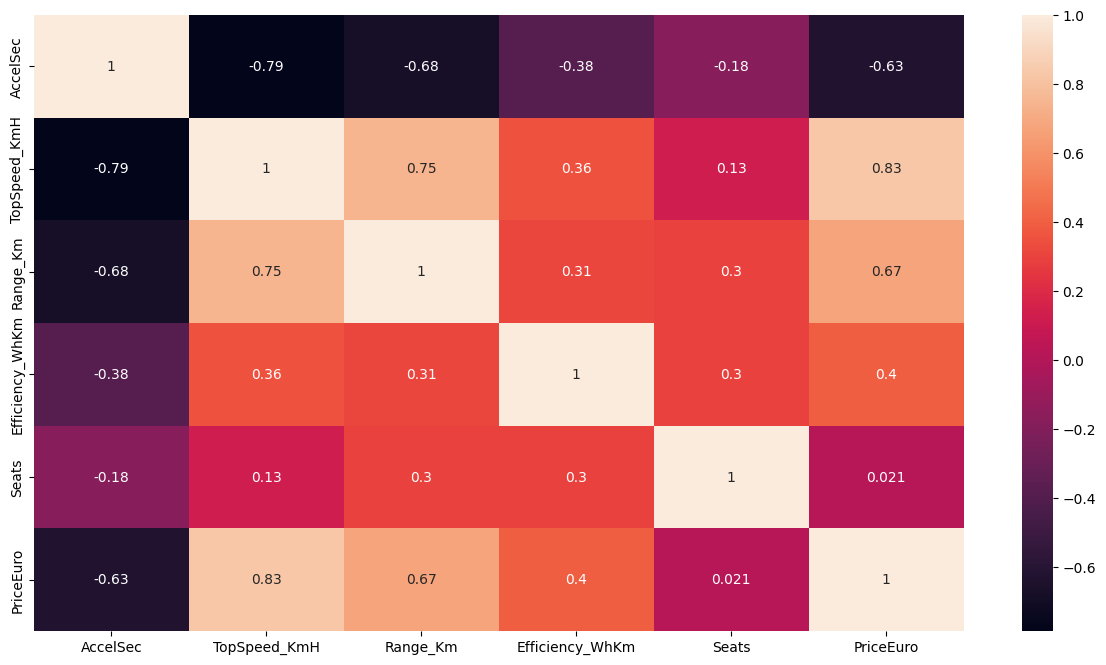

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(df_int_float.corr(), annot=True)
plt.show()

In [18]:
# Average price per segment
print(df.groupby("Segment")["PriceEuro"].mean())

Segment
A     22693.714286
B     34799.227273
C     41199.100000
D     58487.933333
E     74269.400000
F    119690.750000
N     52812.833333
S    215000.000000
Name: PriceEuro, dtype: float64


In [19]:
# Kmeans clustering on Range, Efficiency, Price
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5).fit(df[["Range_Km", "Efficiency_WhKm", "PriceEuro"]])
print(kmeans.labels_)

[4 1 4 0 1 3 1 1 4 4 0 1 1 0 1 1 2 1 1 1 1 4 1 3 0 4 1 0 1 1 0 1 1 0 1 1 4
 4 1 4 0 1 0 1 1 1 4 3 2 1 0 2 1 1 0 1 1 1 1 3 1 0 4 0 4 3 1 4 1 0 4 4 2 0
 1 1 4 1 4 2 1 3 1 4 0 1 4 0 4 1 3 1 1 4 1 1 1 4 4 3 4 0 0]


Silhouette score: 0.584311623422593


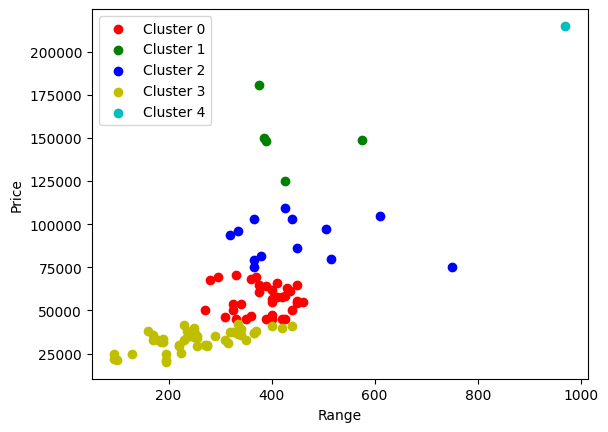

In [20]:
from sklearn.metrics import silhouette_score

# Kmeans clustering from previous code
kmeans = KMeans(n_clusters=5).fit(df[["Range_Km", "Efficiency_WhKm", "PriceEuro"]])

# Calculate silhouette score
score = silhouette_score(df[["Range_Km", "Efficiency_WhKm", "PriceEuro"]], kmeans.labels_)
print("Silhouette score:", score)

# Plot clusters
plt.figure()
colors = ['r', 'g', 'b', 'y', 'c']
for i in range(kmeans.n_clusters):
    cluster_df = df[kmeans.labels_==i]
    plt.scatter(cluster_df["Range_Km"], cluster_df["PriceEuro"], c=colors[i], label="Cluster "+str(i))
plt.xlabel("Range")
plt.ylabel("Price")
plt.legend()

In [21]:
from sklearn.mixture import GaussianMixture

In [22]:
# Preprocess data
X = df[["Range_Km", "Efficiency_WhKm", "PriceEuro"]]
y = df["Segment"]

In [23]:
# K-Means Clustering
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_pred = kmeans.predict(X)
print("K-Means accuracy:", kmeans.score(X, y))

K-Means accuracy: -7585819241.996536


In [24]:
# Gaussian Mixture Model
gmm = GaussianMixture(n_components=5)
gmm.fit(X)
y_pred = gmm.predict(X)
print("GMM accuracy:", gmm.score(X, y))

GMM accuracy: -20.63928689221775


In [25]:
from sklearn.preprocessing import StandardScaler

X = df[["Range_Km", "Efficiency_WhKm", "PriceEuro"]]
y = df["Segment"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA for dimension reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_reduced, y)
y_pred = knn.predict(X_reduced)
print("KNN Accuracy:", knn.score(X_reduced, y))

# Neural Network
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
mlp.fit(X_reduced, y)
y_pred = mlp.predict(X_reduced)
print("NN Accuracy:", mlp.score(X_reduced, y))

KNN Accuracy: 0.7281553398058253
NN Accuracy: 0.6893203883495146


c:\Users\Shubham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# SVM
svm = SVC()
svm.fit(X_train, y_train)
print("SVM Accuracy:", svm.score(X_test, y_test))

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print("RF Accuracy:", rf.score(X_test, y_test))


SVM Accuracy: 0.5238095238095238
RF Accuracy: 0.6666666666666666


Accuracy of Agglomerative clustering: 0.0


Text(0.5, 1.0, 'Agglomerative Dendrogram')

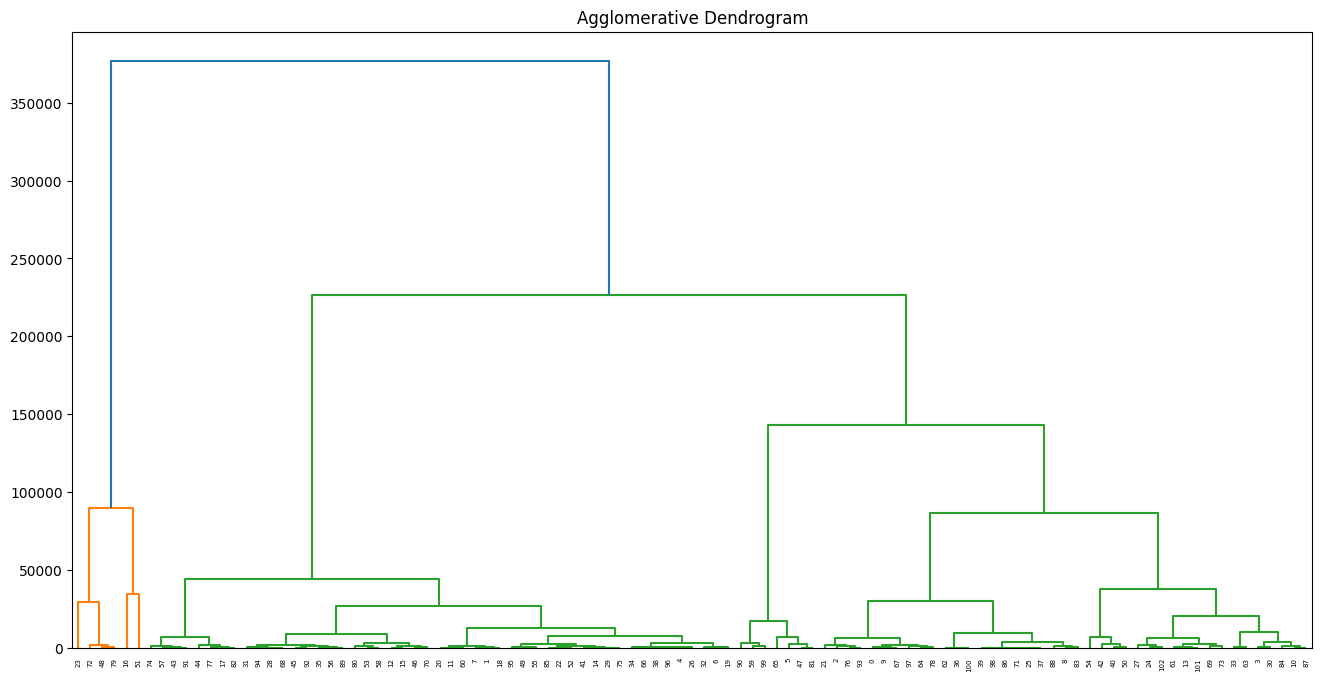

In [27]:
from sklearn.cluster import AgglomerativeClustering, FeatureAgglomeration
from sklearn.metrics import accuracy_score
import scipy.cluster.hierarchy as shc

# Agglomerative clustering
aclust = AgglomerativeClustering(n_clusters=5)
aclust.fit(X)
y_pred = aclust.fit_predict(X)

print("Accuracy of Agglomerative clustering:", accuracy_score(y, y_pred))

# Plot dendrogram
plt.figure(figsize=(16,8))
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.title("Agglomerative Dendrogram")


In [28]:
from scipy.stats import ttest_ind

tstat, pval = ttest_ind(df.loc[df['Segment']=='B', 'PriceEuro'], df.loc[df['Segment']=='D', 'PriceEuro'])
print("p-value:", pval)
# Low p-value indicates significant difference in mean prices

p-value: 3.00053401155972e-15


In [29]:
df_int_float.corr(method='pearson')
# Gives correlation matrix between all variables

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
AccelSec,1.000000,-0.786195,-0.677062,-0.382904,-0.175335,-0.627174
TopSpeed_KmH,-0.786195,1.000000,0.746662,0.355675,0.126470,0.829057
Range_Km,-0.677062,0.746662,1.000000,0.313077,0.300163,0.674844
Efficiency_WhKm,-0.382904,0.355675,0.313077,1.000000,0.301230,0.396705
Seats,-0.175335,0.126470,0.300163,0.301230,1.000000,0.020920
PriceEuro,-0.627174,0.829057,0.674844,0.396705,0.020920,1.000000


In [30]:
from sklearn.linear_model import LinearRegression

X = df[['Range_Km', 'Efficiency_WhKm']]
y = df['PriceEuro']

lr = LinearRegression()
lr.fit(X, y)

print("R-squared:", lr.score(X, y))
# Higher R-squared implies good fit

R-squared: 0.49353346857684144


Text(0.5, 1.0, 'Price Distribution by Segment')

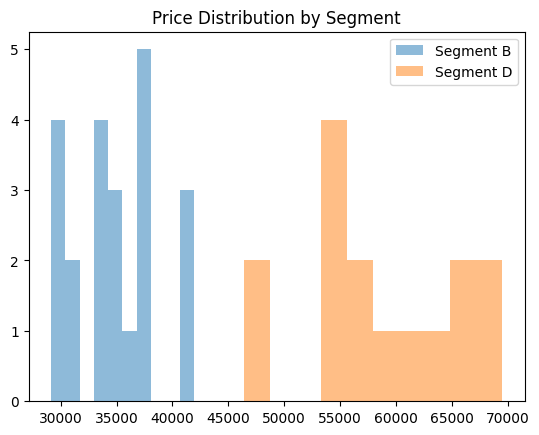

In [31]:
# T-test on Prices
import matplotlib.pyplot as plt
plt.hist(df.loc[df['Segment']=='B', 'PriceEuro'], alpha=0.5, label='Segment B')
plt.hist(df.loc[df['Segment']=='D', 'PriceEuro'], alpha=0.5, label='Segment D')
plt.legend()
plt.title('Price Distribution by Segment')


Text(0.5, 1.0, 'Correlation Matrix')

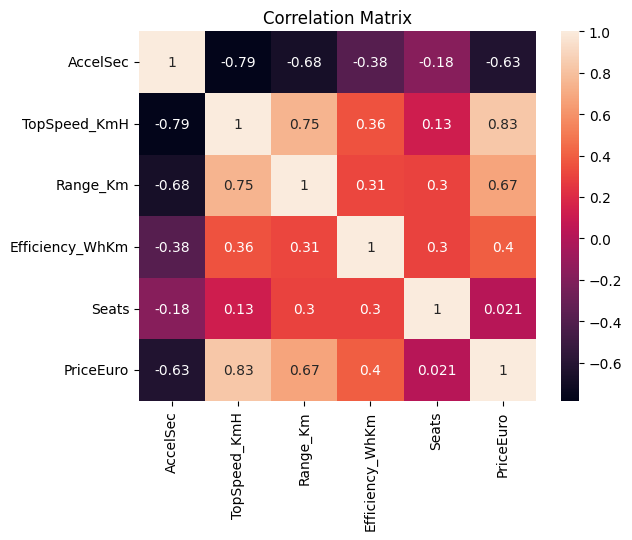

In [32]:
# Correlation Matrix Heatmap
numeric_df = df.select_dtypes(include=[float, int])
corr = numeric_df.corr()
corr = df_int_float.corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix')


Text(0, 0.5, 'Predicted Price')

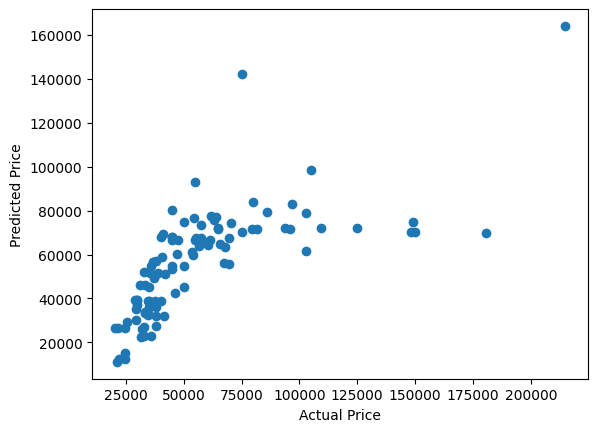

In [33]:
# Regression Prediction vs Actual
y_pred = lr.predict(X)
plt.scatter(y, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')